# Generatore di sequenze di bit pseudocasuali- S09

**Informazioni generali:** Realizzazione generatore pesudocasale 

Dettagli del setup:
* MC14557B
* CD4013B
* AD2 per l'acquisizione dati
* Simulatore evoluzione stati del circuito per $n$ bit con $n \in [1, 46]$ , 47 coming soon...


## Task 1 - Caratteristiche del CD4013B


Utilizziamo il flip-flop 1 dell' integrato, collegando SET1 e RESET1 a massa, in modo da non attivarli spuriamente.

Di seguito la piedinatura.







    














0


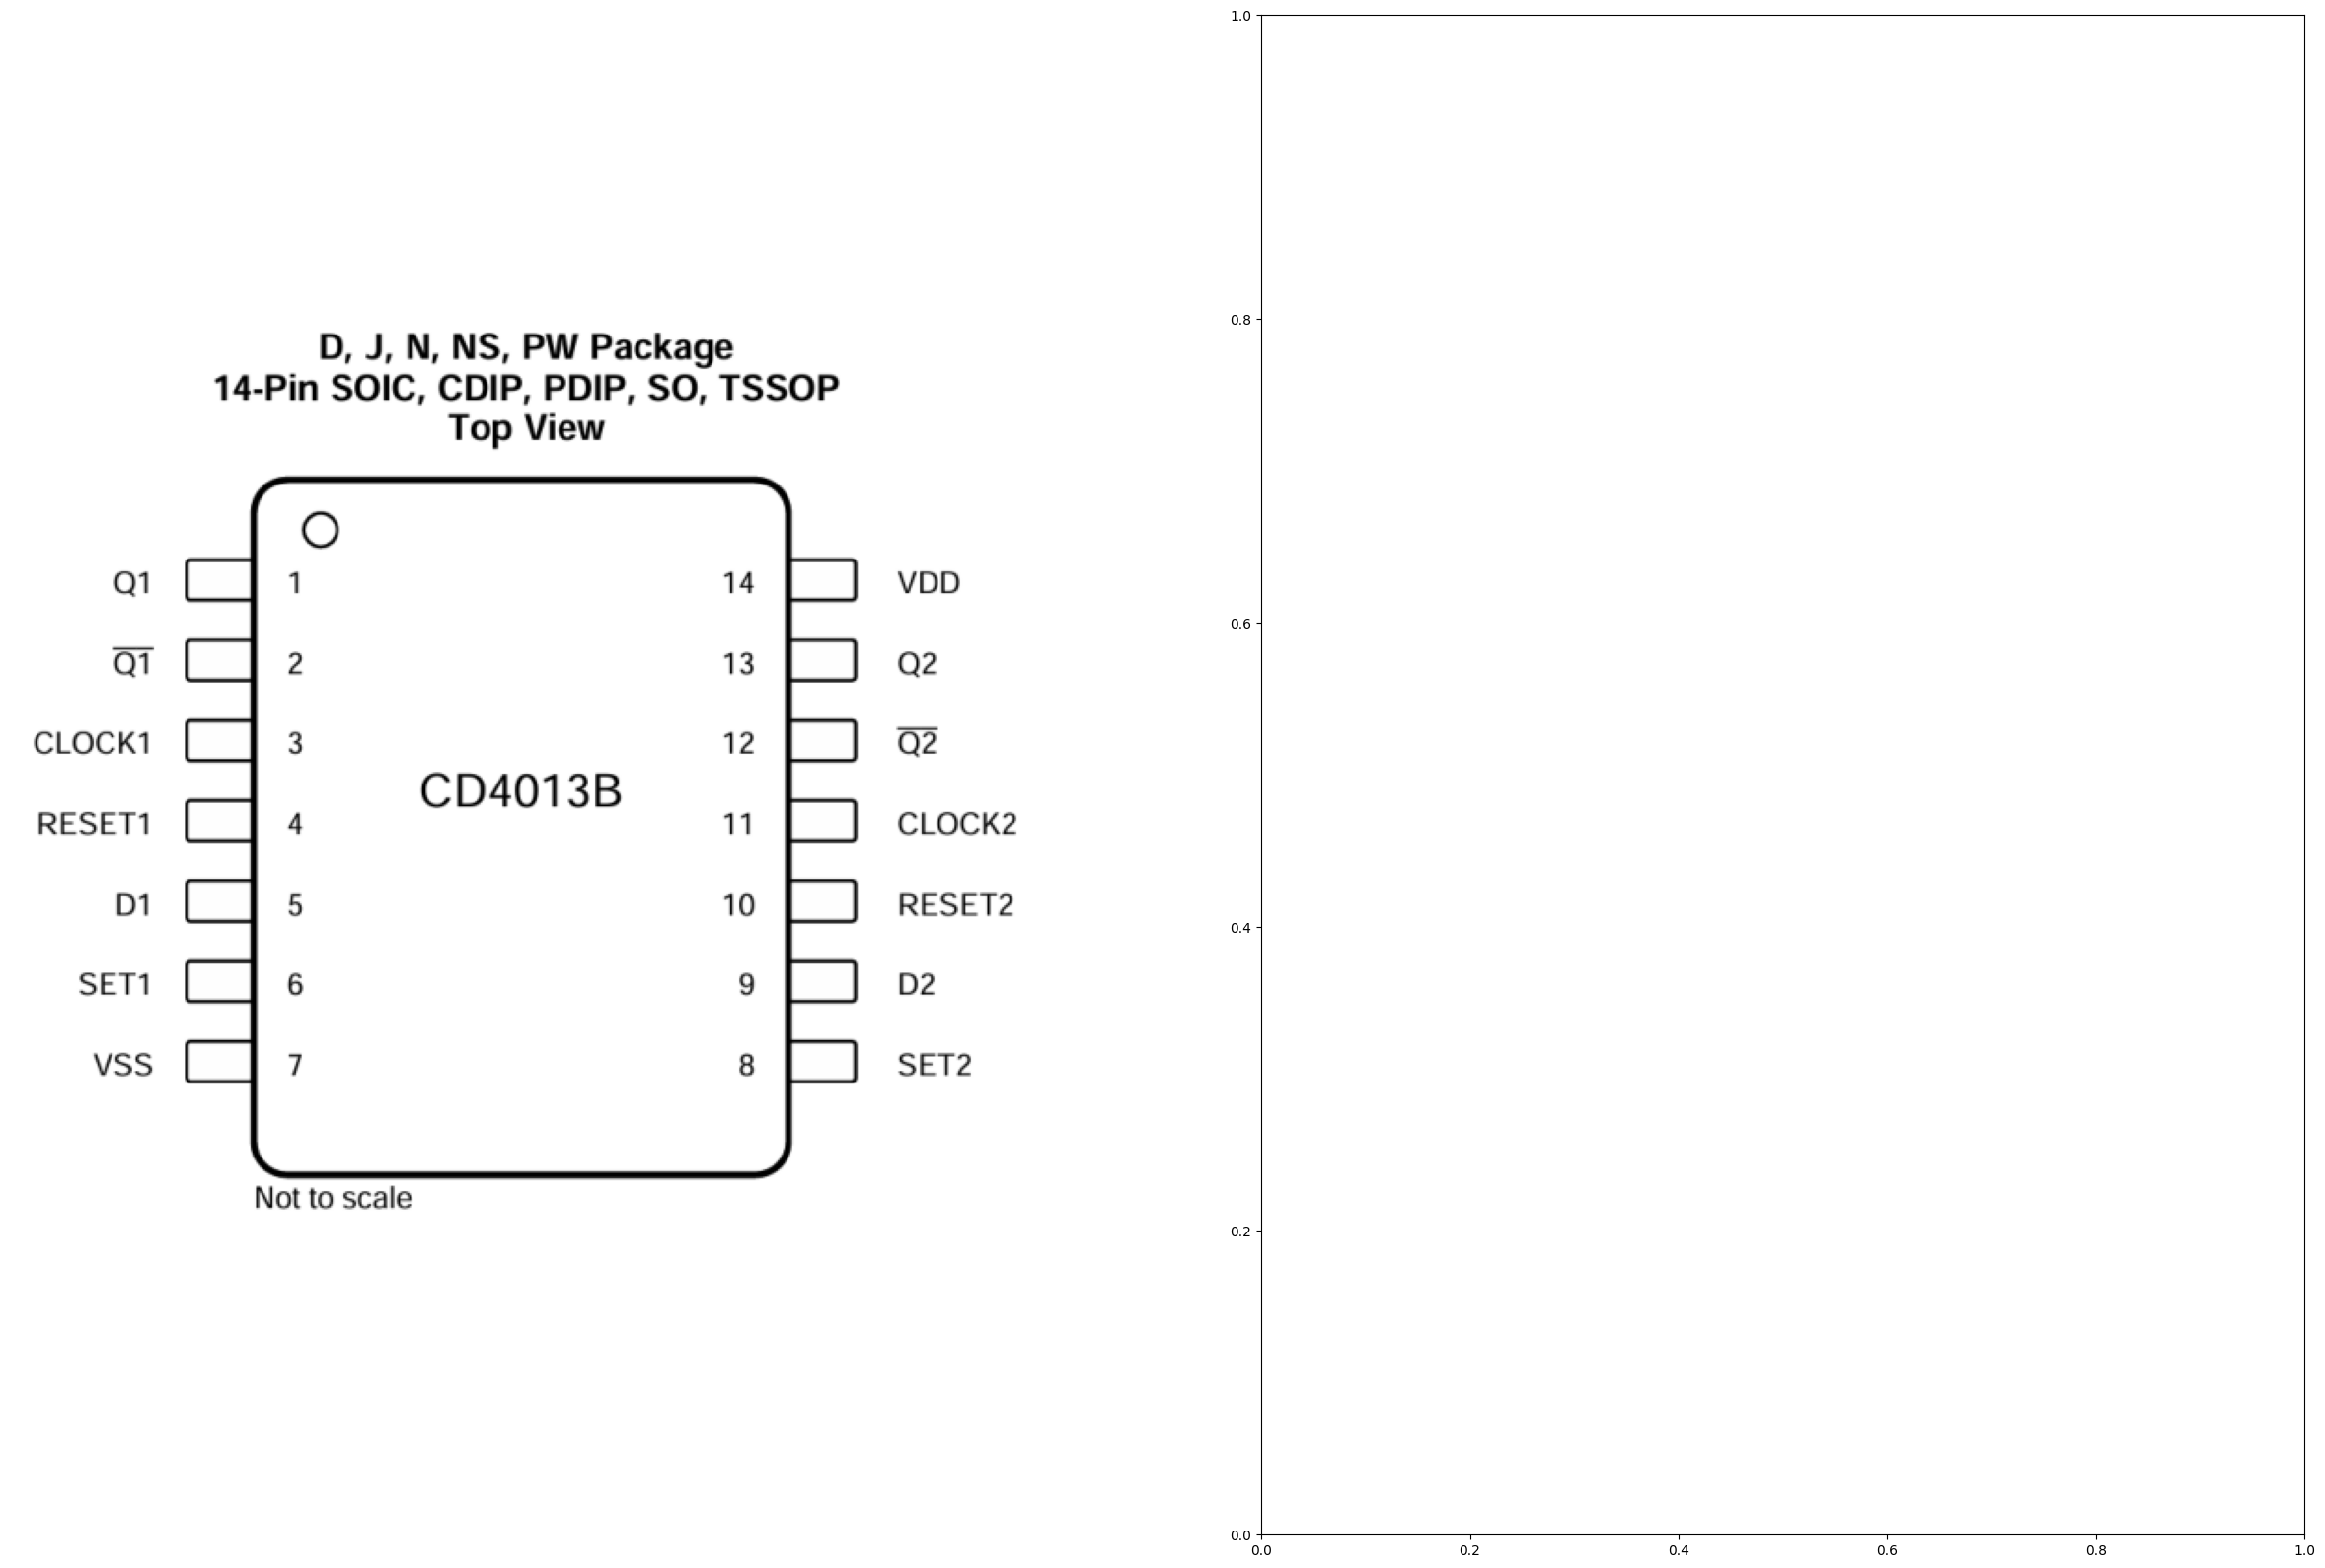

In [250]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 20), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/piedi_CD4013B.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


## Task 2 - Divisore di frequenza per due





0


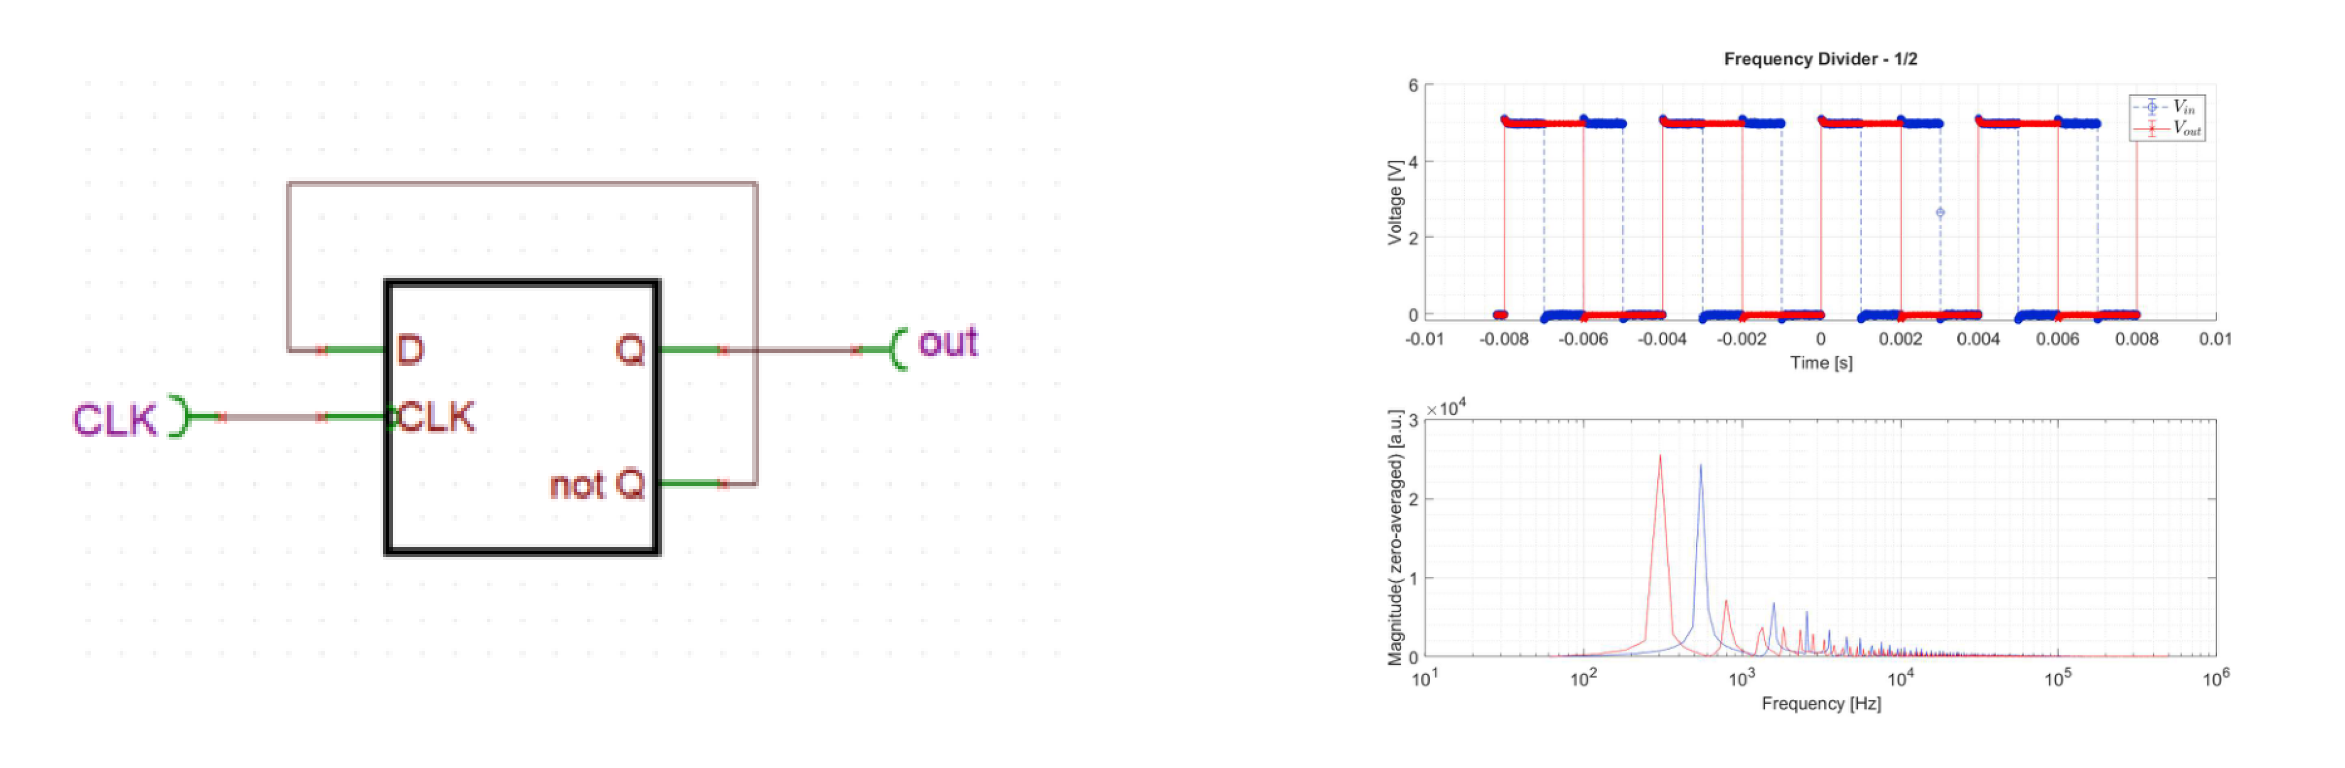

In [251]:
pdfList = ['Media/divisore.png', 'Media/freqDivider05.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Come CLK usiamo un onda quadra tra 0V e 5V , configuriamo SET e RESET dei flip-flop come segue:

Divisore di frequenza per 2. CH1 = CLK = W1, onda quadra 0-5V, 500Hz, CH2 = Q

![Screenshot 2024-12-04 170824.png](<attachment:Screenshot 2024-12-04 170824.png>)

| D | CLK | Q = D+1 |
| :-: | :-: | :-: |
| 0 | up | 1 |
| 1 | up | 0 |



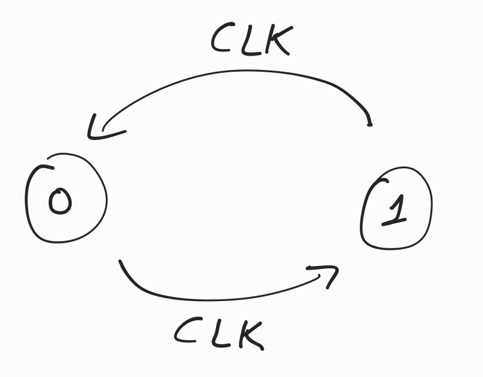

## Task 3 - Diagramma di stato del divisore per 1.33

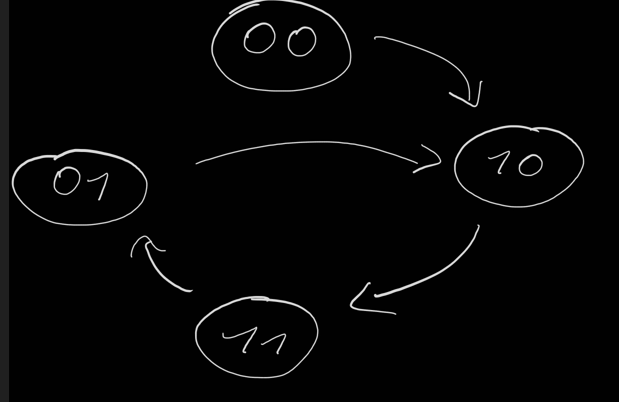

| Q1 | Q2 | D | S | S+1 |
| :-: | :-: | :-: | :-: | :-: |
| 0 | 0 | 1 | 1 | 3 |
| 0 | 1 | 1 | 2 | 3 |
| 1 | 1 | 0 | 4 | 2 |

Il circuito è sincrono perché il CLK dei due integrati è lo stesso, si comporta come un divisore di frequenza.





## Task 4 - Divisore di frequenza con porte NAND del CD4011



0


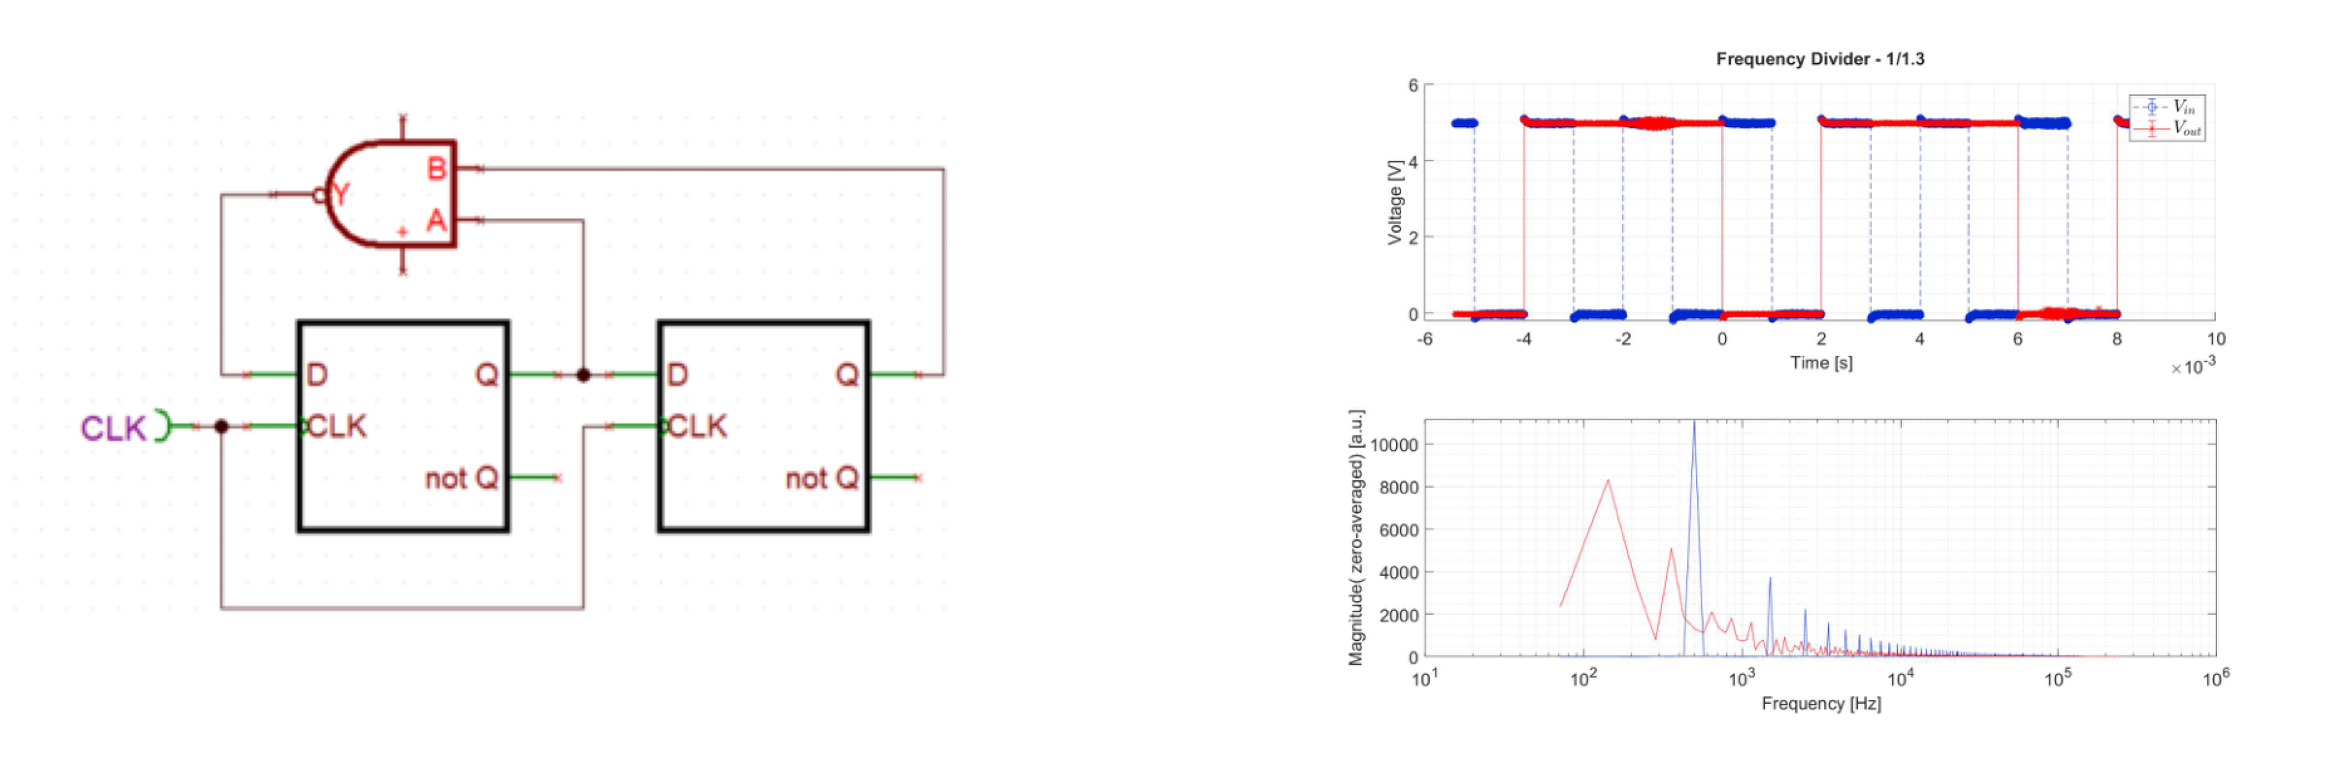

In [252]:
pdfList= ['Media/divisore_con_NAND.png', 'Media/freqDivider076.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


Divisore di frequenza per 1.33, CH1 = CLK = W1, CH2 = uscita NAND,  onda quadra 0-5V, 500Hz, CH2 = Q

## Task 5 - Funzionamento MC14557


0


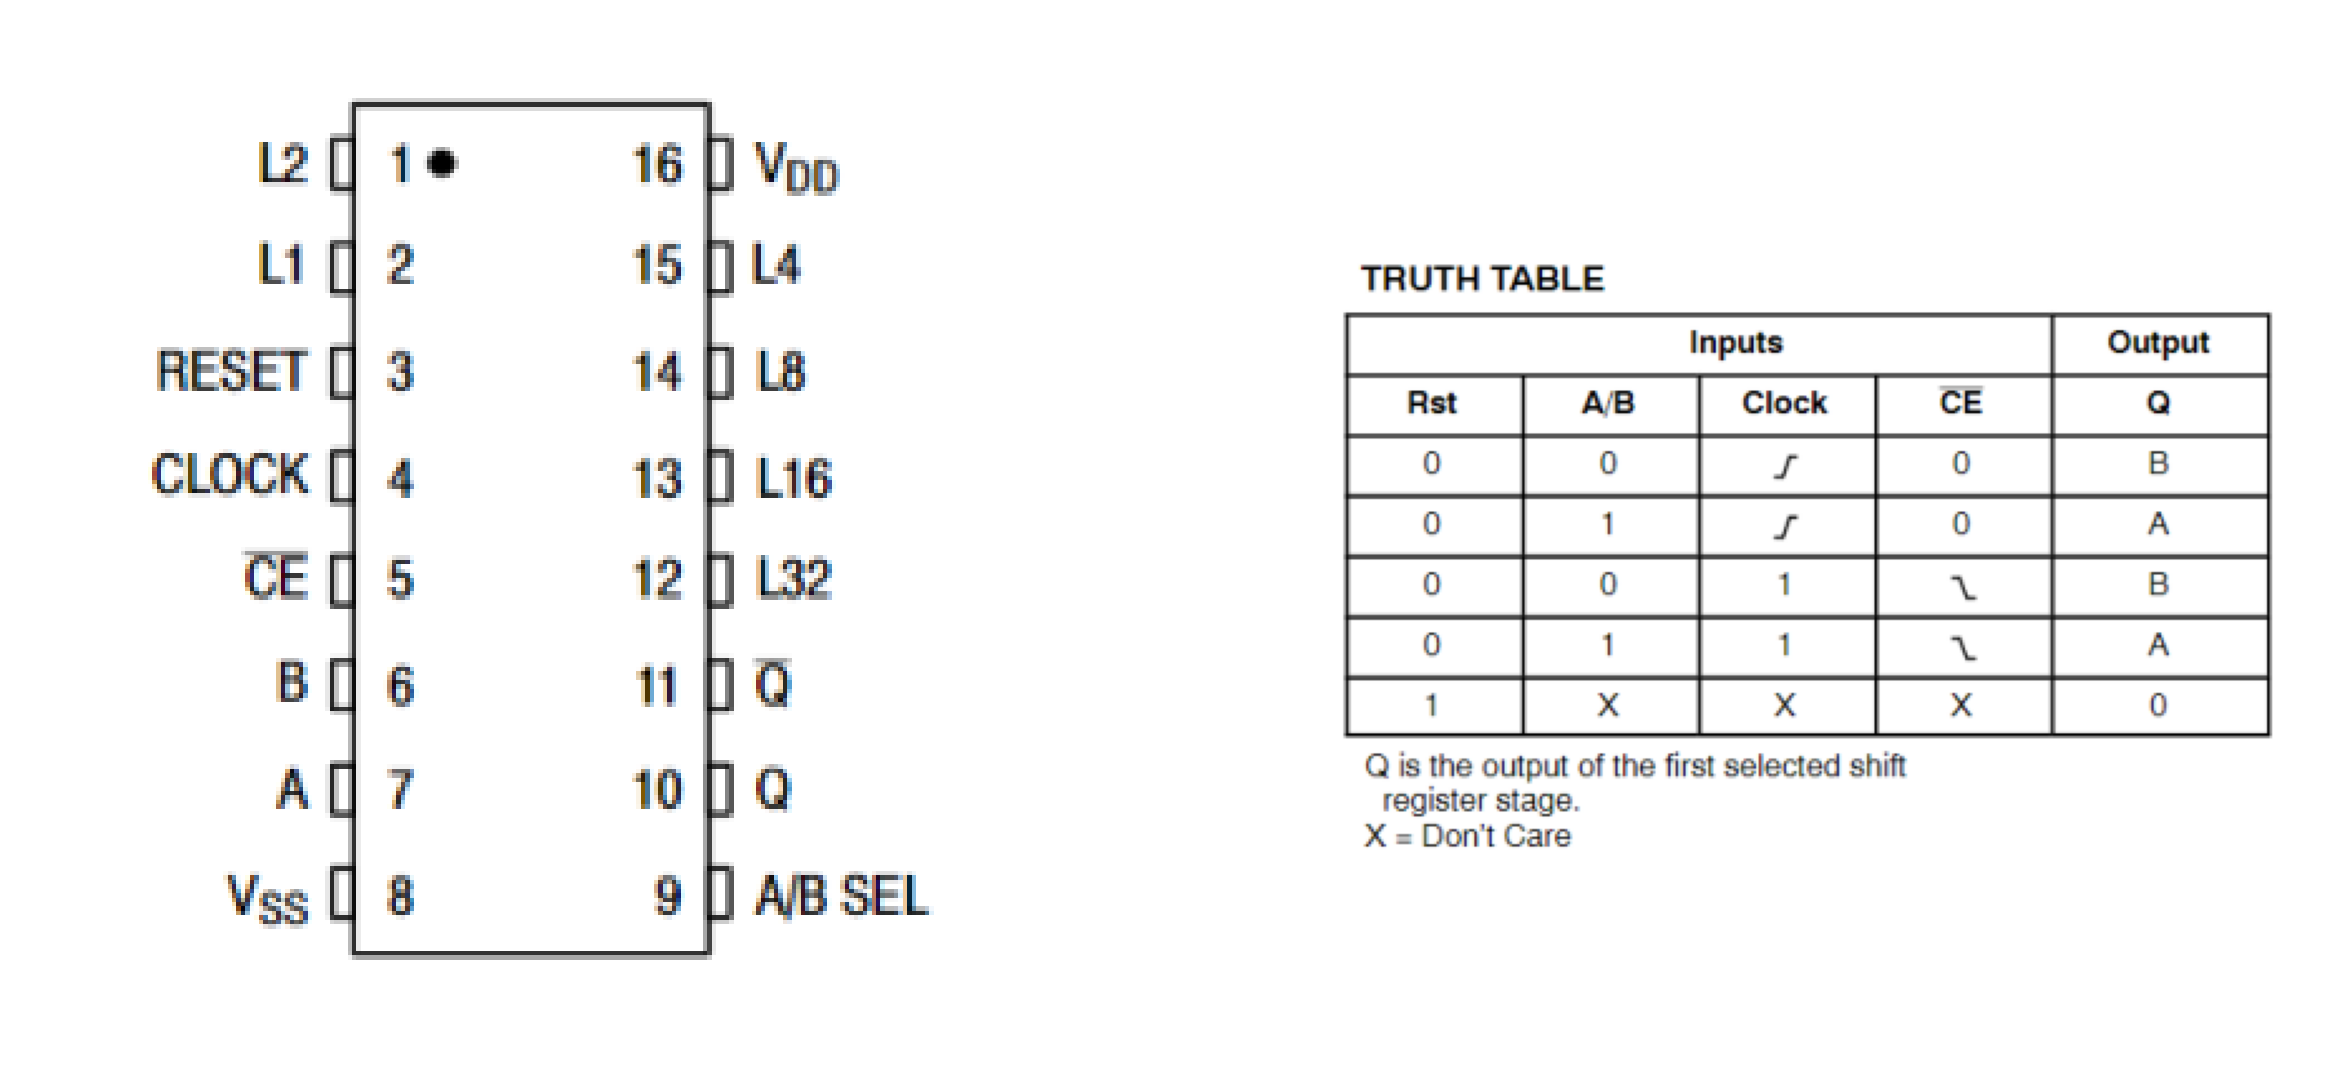

In [253]:

pdfList= ['Media/piedi_MC14557.png', 'Media/ABsel_MC14557.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


0


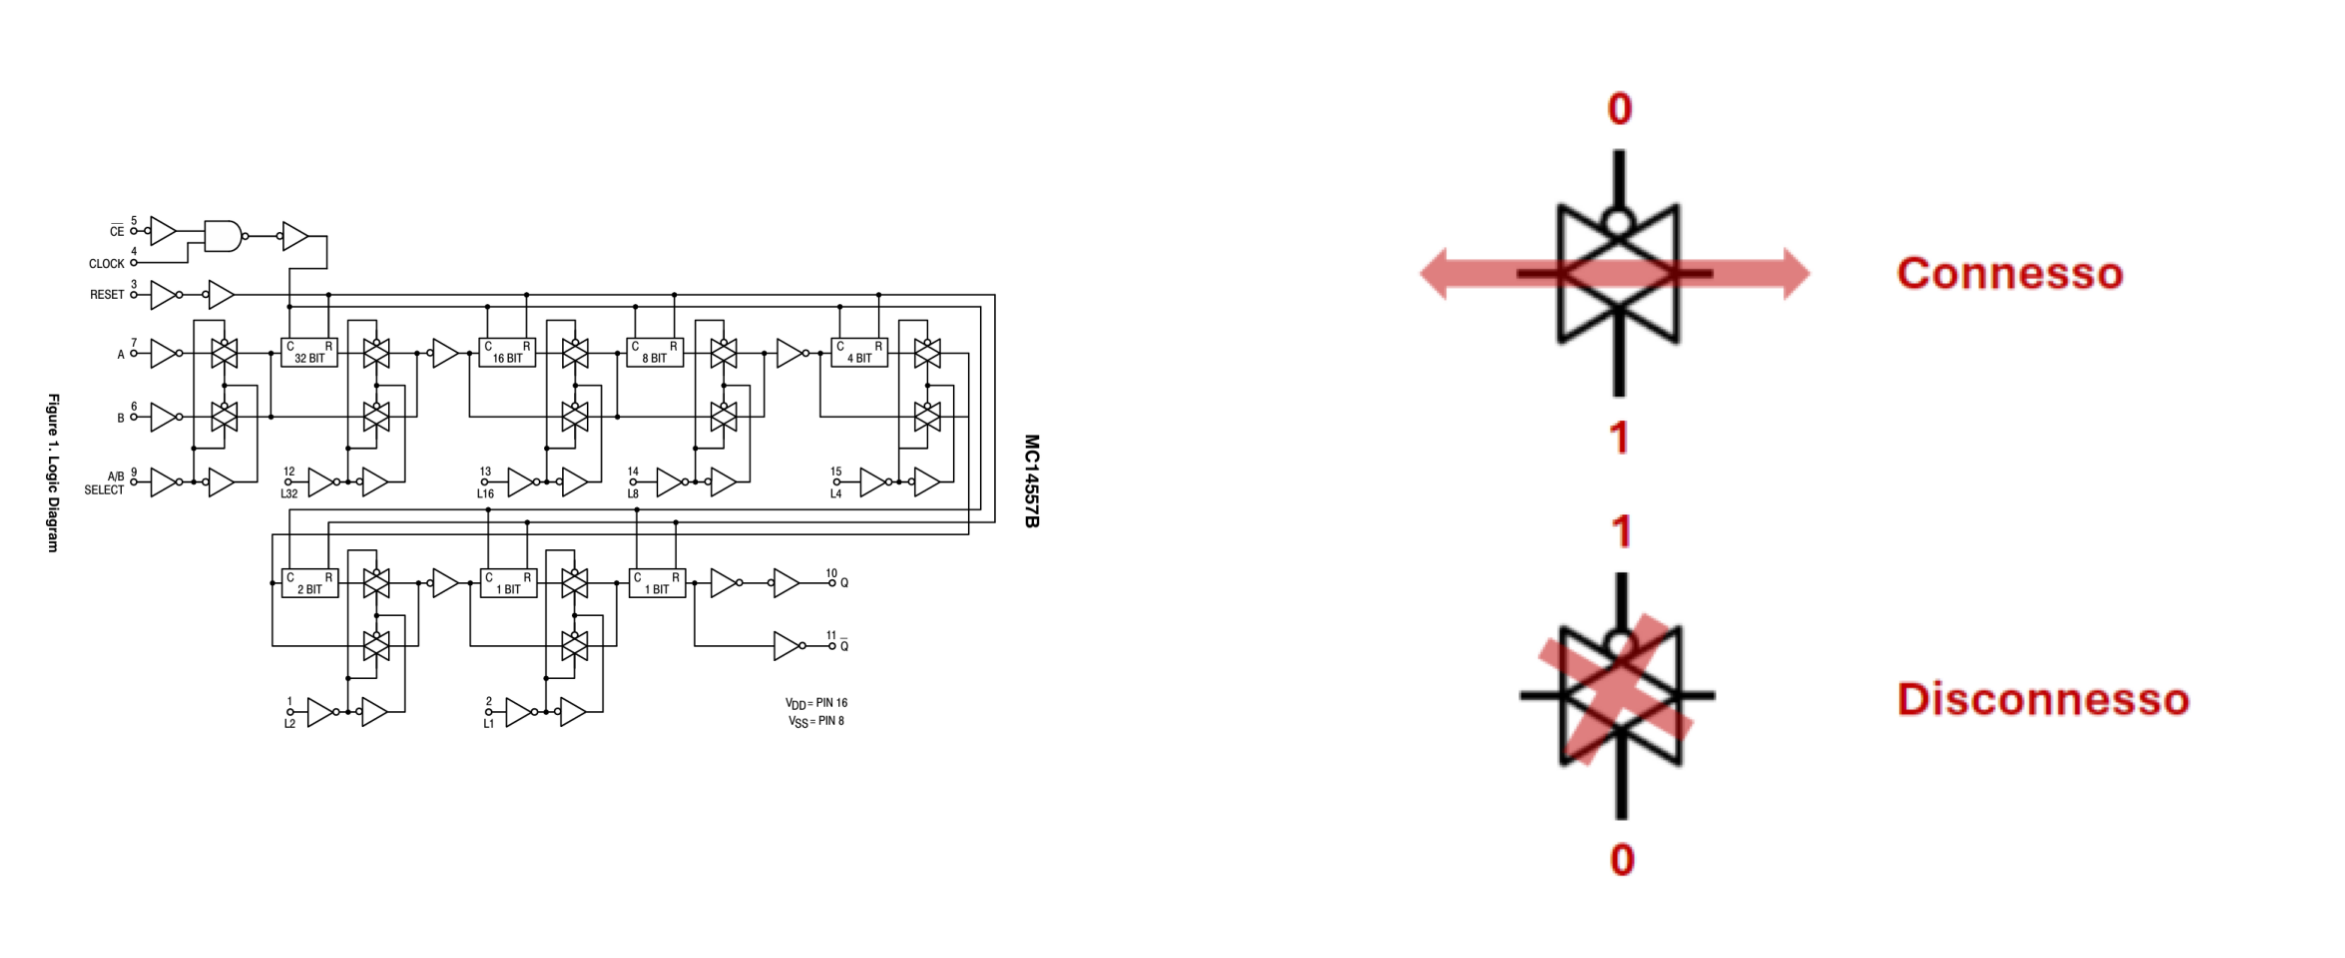

In [254]:

pdfList= [ 'Media/superpiedi_MC14557.png', 'Media/MC14557_funza.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)




Si nota facilmente come i componenti presenti sulla destra agiscano come porte di connessione solamente nella configurazione presentata in alto, mentre nella seconda essi presentino un'alta impedenza tra ingresso e uscita.

Dunque osservando lo schema logico sulla sinistra si può vedere come ci siano coppie di questi dispositivi con funzionamento complementare in maniera tale che il segnale dall'ingresso viaggi sempre verso l'uscita. ma possa bypassare o meno dei registri a scorrimento "tradizionali" presenti all'interno dell'integrato, in modo da o meno essere attivi.

Si può anche riscontrare come uno dei registri non sia mai bypassabile e come lo stesso circuito utilizzato nei bypass sia utilizzato per selezionare tra ingresso A e B.

Inoltre è interessante vedere che il clock enable può essere utilizzato come ingresso a clock falling-edge una volta settato l'ingresso di clock a basso.









## Task 6 - Misura tempo di propagazione del segnale lungo bit di varia lunghezza 









## Task 7 - Registro a scorrimento a n+1 bit

Per realizzare un registro a n+1 bit si è collegata l uscita Q si MC14557 all' ingresso D di uno dei flip flop di CD4013, ed entrambi i componenti sono stati collegati al CLK. Abbiamo poi collegato tutti i pin a GND o a 5V in base ai nostri scopi, per evitare effetti spuri. Per verificare il corretto comportamento del circuito abbiamo controllato che l uscita di Q ricevesse l entrata di A dopo un numero sufficiente di clock.

## Homework 1

Sequenza fino a n = 5

1	011

2	0010111

3	000100110101111

4	000010001100101011111

5	000001000011000101001111010001110010010110111011001101010111111

## Task 8 - Generatore pesudocasuale


Sequenza 1 bit:	011


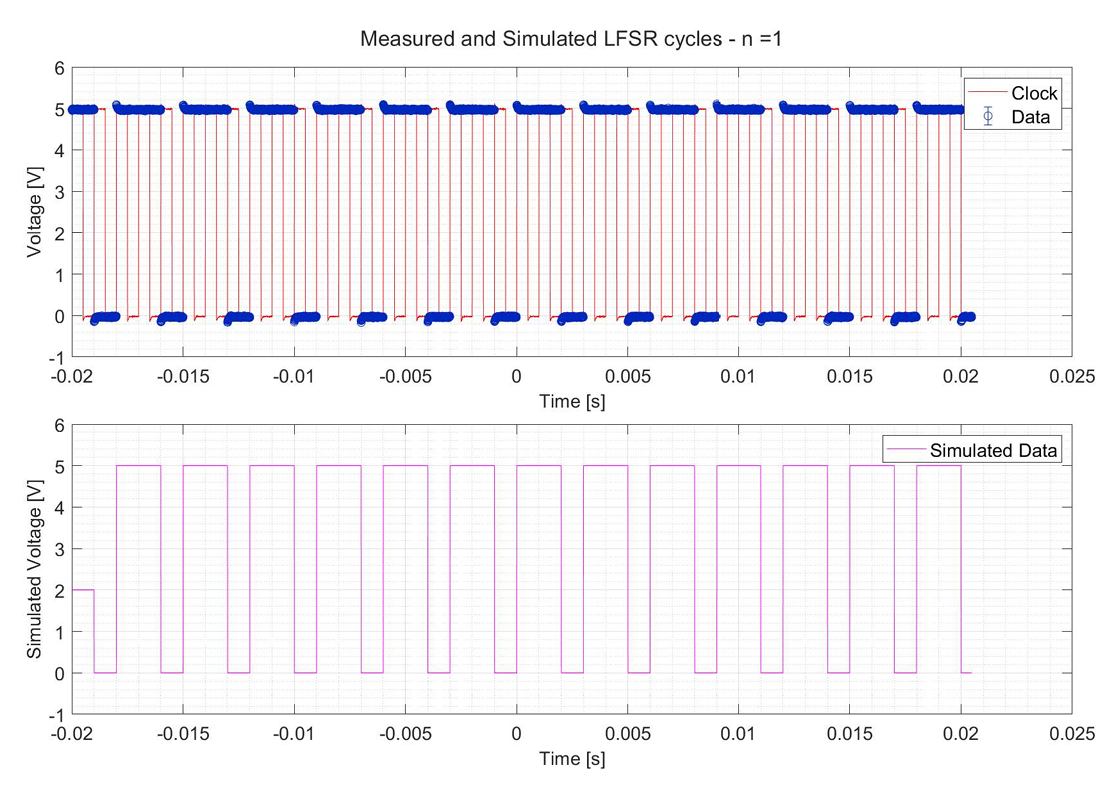




Sequenza 2 bit:	0010111


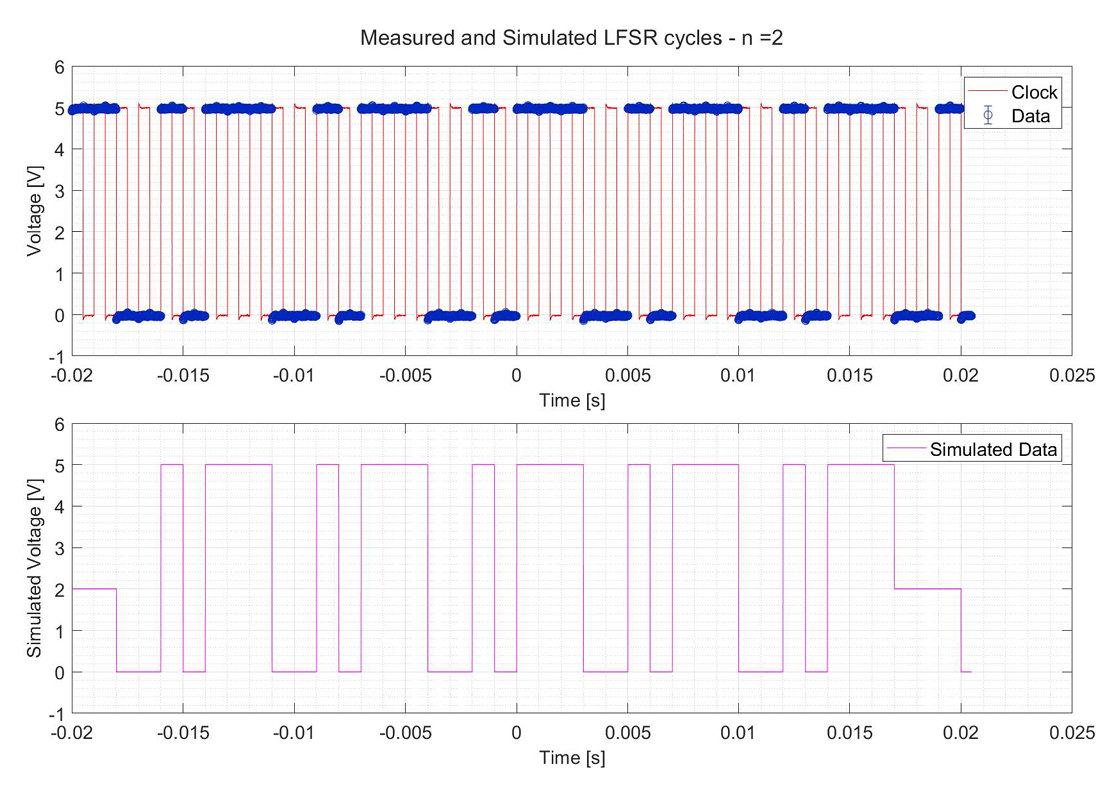




Sequenza 3 bit:	000100110101111


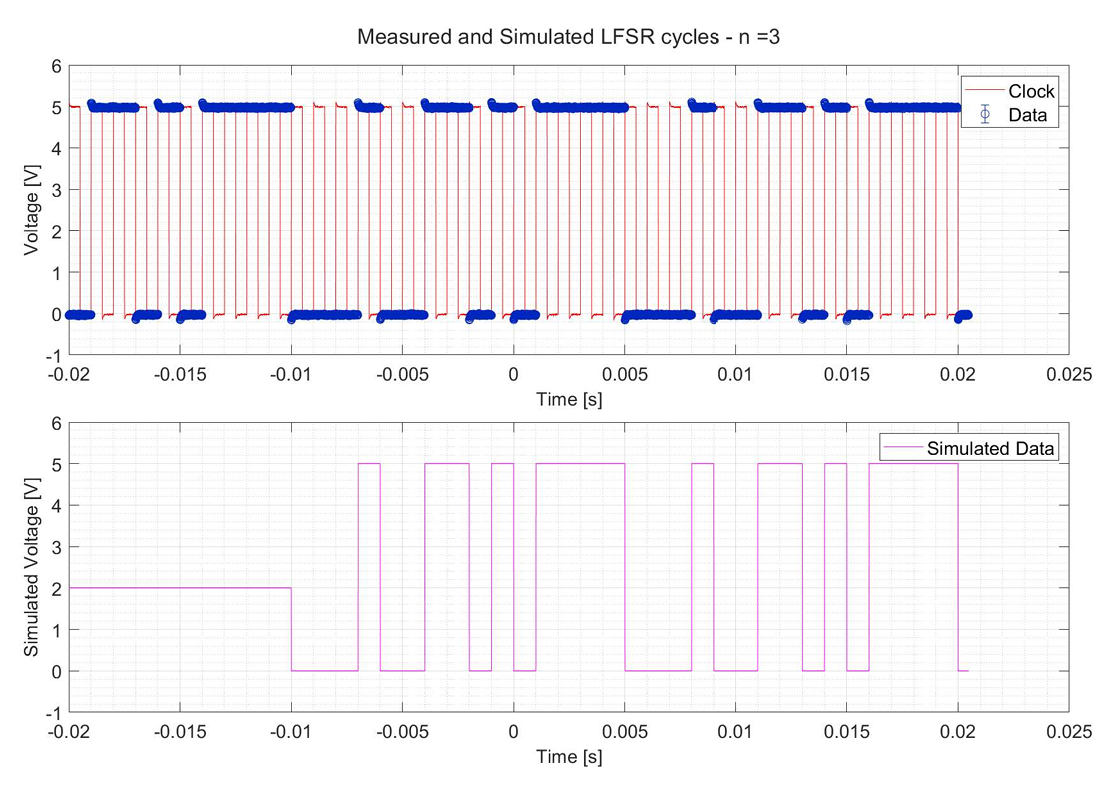




Sequenza 4 bit:	000010001100101011111


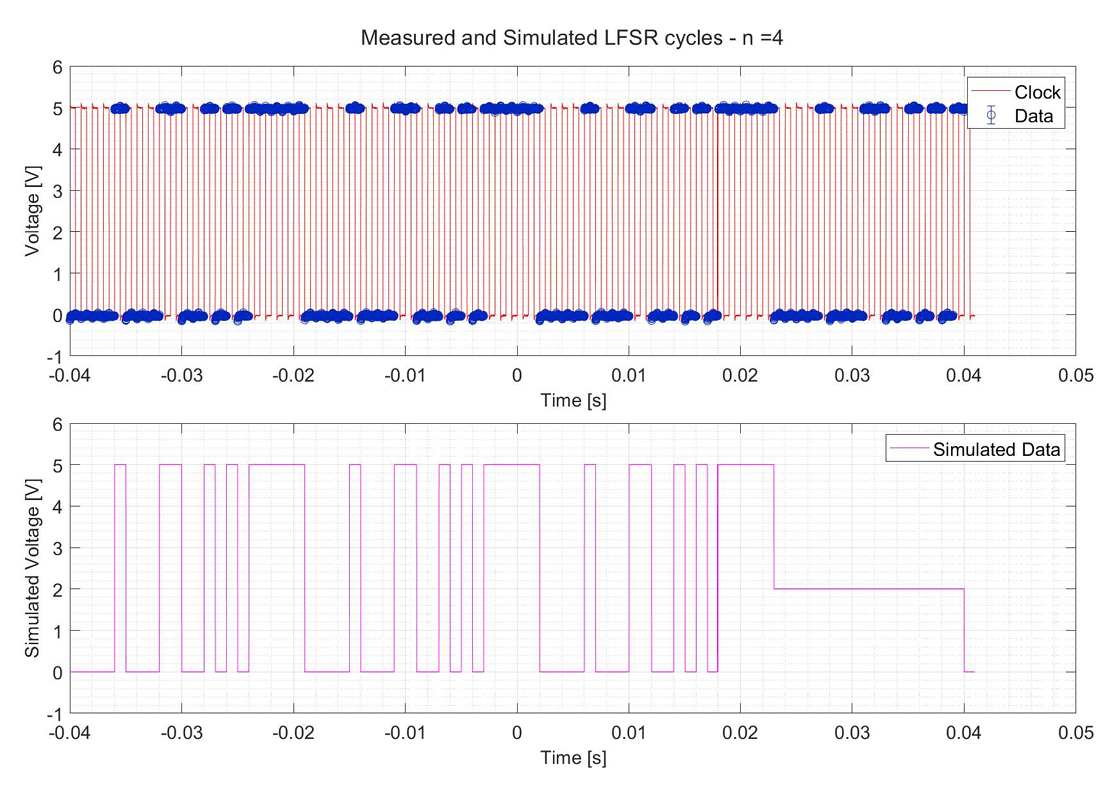




Sequenza 5 bit:	000001000011000101001111010001110010010110111011001101010111111


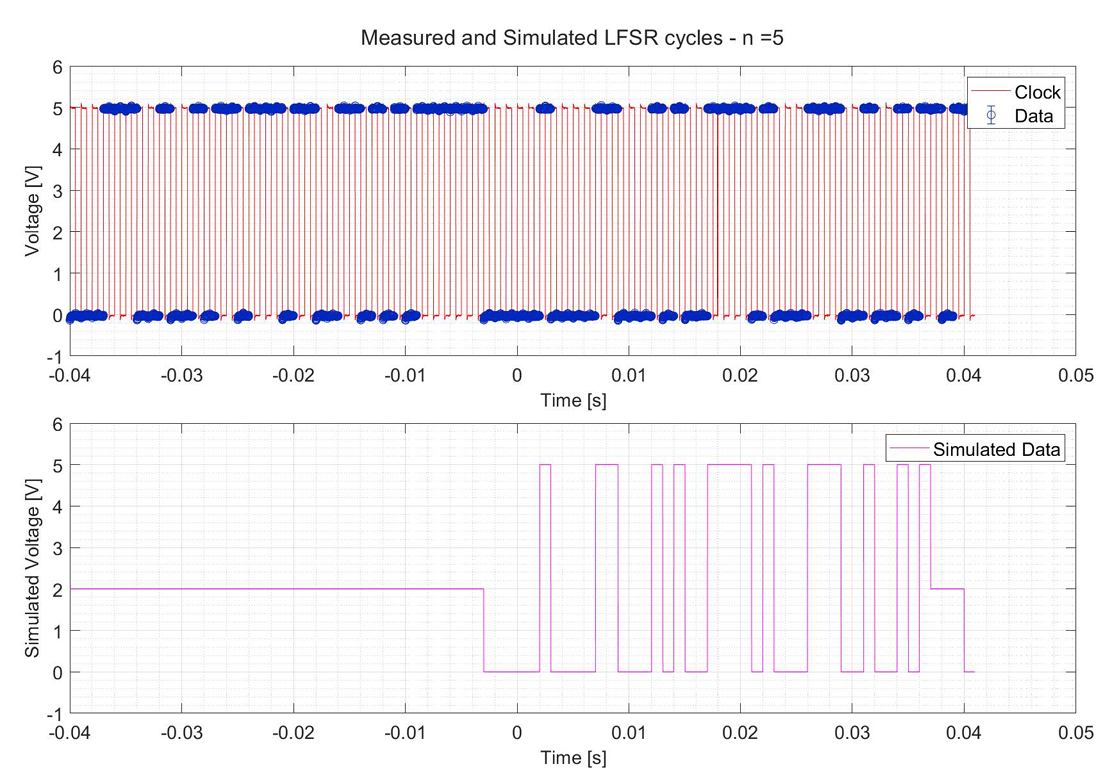


## Task 9 - Codice MATLAB

## Task 10 - Test dei limiti del sistema

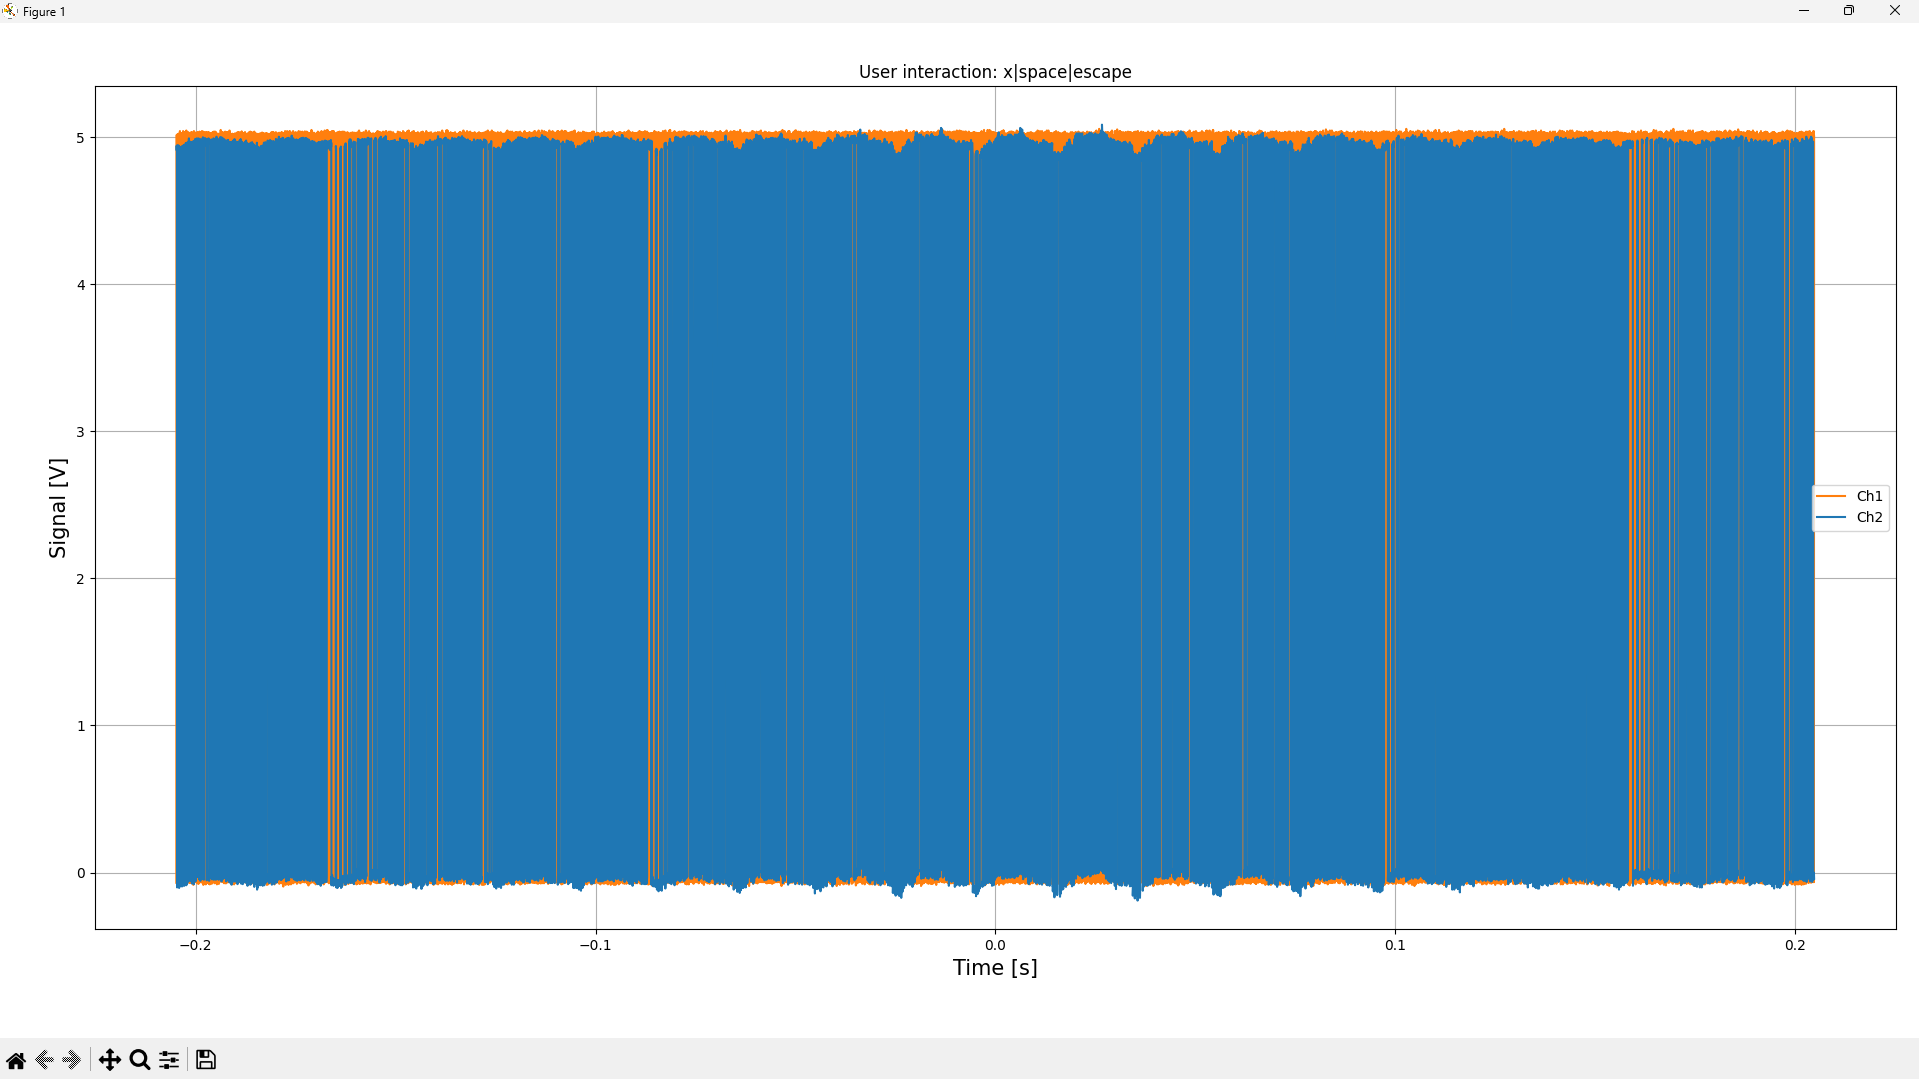

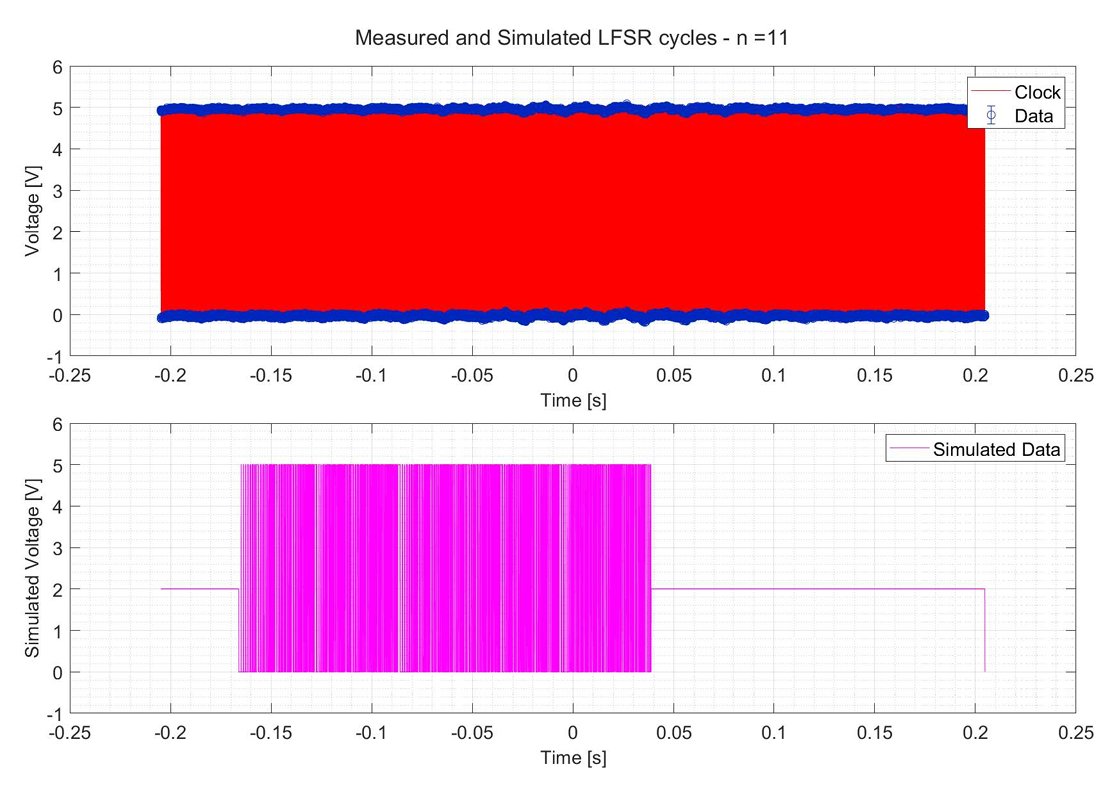











Il codice considera solo le sequenze massimali di bit per un dato n, con il calcolatore è stato possibile otterle fino a 46bit, sperimentalmente invece abbiamo potuto osservare la periodicità di un ciclo solo fino a 3255 passaggi. Sotto è riportata la tabella dei passaggi delle sequenze a n fissato.

| n bit | passaggi ciclo massimale |
| :-: | :-: |
|1|	    3|
|2|	    7|
|3|	    15|
|4|	    21|
|5|	    63|
|6|	    127|
|7|	    63|
|8|     73|
|9|	    889|
|10|	1533|
|11|	3255|
|12|	7905|
|13|	11811|
|14|	32767|
|15|	255|
|16|	273|
|17|	253921|
|18|	413385|
|19|	761763|
|20|	5461|
|21|	4194303|
|22|	2088705|
|23|	2097151|
|24|	10961685|
|25|	298935|
|26|	125829105|
|27|	17895697|
|28|	402653181|
|29|	10845877|
|30|	2097151|
|31|	1023|
|32|	1057|
|33|	255652815|
|34|	3681400539|
|35|	22839252821|
|36|	137438167041|
|37|	25769803773|
|38|	178979337621|
|39|	320319056211|
|40|	545460846465|
|41|	1374389534715|

